In [2]:
!pip install jovian --upgrade --quiet

In [5]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as tt
from torchvision.datasets import ImageFolder

In [6]:
#download the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/imagewoof-160.tgz"
download_url(dataset_url, '.')

# extract the archive

with tarfile.open('./imagewoof-160.tgz', 'r:gz') as tar: #read file in r mode
  tar.extractall(path = './data') #extract all folders from zip file and store under folder named data

### Exploring the dataset and how the images are stored

The dataset contains 2 folders named train and val. Each of them contains 10 folders, one for each class of images.

In [7]:
data_dir = './data/imagewoof-160'

print(os.listdir(data_dir))

['val', 'train']


In [8]:
print(os.listdir('./data/imagewoof-160/train'))
print(len(os.listdir('./data/imagewoof-160/train')))

['n02105641', 'n02115641', 'n02093754', 'n02099601', 'n02096294', 'n02088364', 'n02111889', 'n02087394', 'n02086240', 'n02089973']
10


Since the classses are not in the name of the dog breeds, I will take the name of the breeds mentioned on it's original link/website (https://github.com/fastai/imagenette). 

In [9]:
classes = ['Australian terrier', 'Border terrier', 'Samoyed', 'Beagle', 'Shih-Tzu', 'English foxhound', 'Rhodesian ridgeback', 'Dingo', 'Golden retriever', 'Old English sheepdog']
len(classes)

10

Checking how many images are in each class/folder.

In [10]:
train_directory = './data/imagewoof-160/train'

for root, dirs, files in os.walk(train_directory):
  if files == []:
    continue
  else:
    print(len(files))

1300
1300
1300
1300
1300
1300
1300
1300
1300
754


This shows that not all classes in the train folder have the same number of images but val folder have the same number of images.

In [11]:
test_directory = './data/imagewoof-160/val'

for root, dirs, files in os.walk(test_directory):
  if files == []:
    continue
  else:
    print(len(files))

50
50
50
50
50
50
50
50
50
50


Let's check the size of the images to see if all of them have the same size/shape.

In [12]:
# transform all the images into tensors

image_size_test = ImageFolder(train_directory, tt.ToTensor())

In [13]:
len(image_size_test)

12454

In [14]:
#checking the size of the first 10 images in the dataset

im_count = 0
for image,_ in image_size_test:
  im_count += 1
  print(image.shape)
  if im_count == 10:
    break    

torch.Size([3, 160, 213])
torch.Size([3, 160, 213])
torch.Size([3, 213, 160])
torch.Size([3, 160, 213])
torch.Size([3, 160, 192])
torch.Size([3, 160, 211])
torch.Size([3, 160, 219])
torch.Size([3, 213, 160])
torch.Size([3, 160, 213])
torch.Size([3, 160, 213])


As above, we can see that images have different sizes. Let's find out the minimum height and width of the images.

In [15]:
#checking the maximum and minimum size of the images of the whole dataset

height = []
width = []
for image,_ in image_size_test:
  height.append(image.shape[1])
  width.append(image.shape[2])
print("minimum height: {}, maximum height: {}, minimum width: {}, maximum width: {}".format(min(height), max(height), min(width), max(width)))

minimum height: 160, maximum height: 391, minimum width: 160, maximum width: 615


Since the images have minimum width and height of 160 pixels, I will resize them all to (160 x 160) to avoid getting errors due to size difference.

In [17]:
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

train_tfms = tt.Compose([tt.RandomCrop(160, padding=1, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(),
                         tt.RandomRotation(degrees=15),
                         tt.ToTensor(),
                         tt.Normalize(*stats,inplace=True)])

test_tfms = tt.Compose([tt.RandomResizedCrop(160),
                        tt.ToTensor(), tt.Normalize(*stats)])

In [18]:
train_full_ds = ImageFolder(data_dir + '/train', train_tfms)
test_ds = ImageFolder(data_dir + '/val', test_tfms)

In [19]:
#checking the size of the first 10 images in the dataset

im_count = 0
for image,_ in train_full_ds:
  im_count += 1
  print(image.shape)
  if im_count == 10:
    break    

torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])


In [20]:
#checking the maximum and minimum size of the images of the whole dataset after resizing

height = []
width = []
for image,_ in train_full_ds:
  height.append(image.shape[1])
  width.append(image.shape[2])
print("minimum height: {}, maximum height: {}, minimum width: {}, maximum width: {}".format(min(height), max(height), min(width), max(width)))

minimum height: 160, maximum height: 160, minimum width: 160, maximum width: 160


In [21]:
img, label = train_full_ds[9500]
print(img.shape, label)
img

torch.Size([3, 160, 160]) 7


tensor([[[-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         ...,
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291]],

        [[-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         ...,
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183]],

        [[-2.2214, -2.2214, -2.2214,  ..., -2.2214, -2.2214, -2.2214],
         [-2.2214, -2.2214, -2.2214,  ..., -2

Now all the images in the dataset have the same size of 160 x 160!

Just for my personal note, I will create a dictionary by matching the classes (which are in numbers) of the dataset and it's names in text.

In [24]:
print(train_full_ds.classes)

['n02086240', 'n02087394', 'n02088364', 'n02089973', 'n02093754', 'n02096294', 'n02099601', 'n02105641', 'n02111889', 'n02115641']


In [25]:
classes_dict = dict(zip(tr.classes, classes))
classes_dict

NameError: ignored

Let's take a look at the images and see those cute doggies.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
def show_example(img,label):
  print('Label: ', classes[label], '('+str(label)+')')
  plt.imshow(img.permute(1, 2, 0))

In [ ]:
show_example(*train_full_ds[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  Dingo (7)


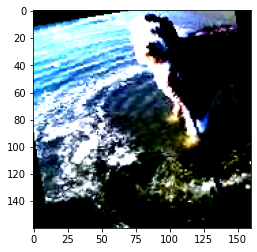

In [ ]:
show_example(*train_full_ds[9500])

### Training and Validation Datasets

In [ ]:
random_seed = 43
torch.manual_seed(random_seed);

In [ ]:
len(train_full_ds)

12454

In [ ]:
#split the dataset into 11954 images for training and 500 images for validation

val_size = 500

train_size = len(train_full_ds) - val_size

train_ds, val_ds = random_split(train_full_ds, [train_size, val_size])
len(train_ds), len(val_ds)

(11954, 500)

##### Logging the information

##### Create Dataloaders to for training and validation to load the data in batches

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size = 64

In [ ]:
#load the data by batches

train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers= 4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size * 2, num_workers=4, pin_memory=True)

We will see batches of images using make_grid method.

In [ ]:
from torchvision.utils import make_grid

def denormalize(images, means, stds):
  means = torch.tensor(means).reshape(1,3,1,1)
  stds = torch.tensor(stds).reshape(1,3,1,1,)
  return images * stds + means


def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize = (12,12))
    ax.set_xticks([]), ax.set_yticks([])
    denorm_images = denormalize(images, *stats)
    ax.imshow(make_grid(denorm_images[:64],nrow = 8).permute(1,2,0).clamp(0,1))
    break


On the side note, this is the page I found helpful for augmentation (ie. resizing the images in this case). https://debuggercafe.com/image-augmentation-using-pytorch-and-albumentations/

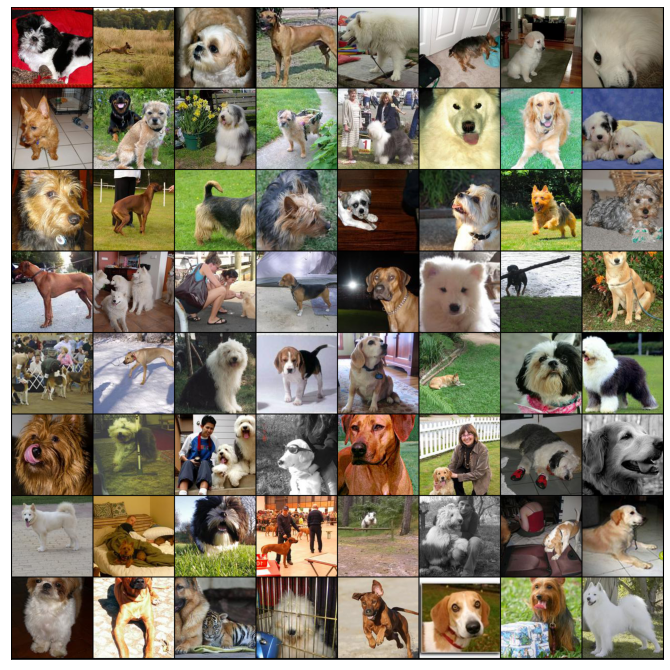

In [ ]:
show_batch(train_dl)

Oh wow! cuties everywhere :D

Let's define a model by extending an ImageClassificationBase class which contains helper methods for training and validation.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

We'll use nn.Sequential to chain the layers and activations functions into a single network architecture.

In [ ]:
class Imagewoof(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4), # output: 64 x 40 x 40

            #nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            #nn.ReLU(),
            #nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            #nn.ReLU(),
            #nn.MaxPool2d(2, 2), # output: 128 x 40 x 40

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 1024 x 20 x 20

            nn.Conv2d(1024, 2048, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(2048, 2048, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4), # output: 1024 x 5 x 5

            nn.Flatten(), 
            nn.Linear(2048 * 5 * 5, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = Imagewoof()
model

Imagewoof(
  (network): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(2048, 2048, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=51200, out_features=2048, bias=True)
    (17): ReLU()
    (18): Linear(in_

Let's verify that the model produces the expected output on a batch of training data.

In [ ]:
for images, labels in train_dl:
  print('images.shape', images.shape)
  out = model(images)
  print('out.shape', out.shape)
  print('out[0]:', out[0])
  break

images.shape torch.Size([64, 3, 160, 160])
out.shape torch.Size([64, 10])
out[0]: tensor([-0.0989, -0.0866,  0.0775, -0.0218, -0.0607,  0.0367,  0.0813, -0.0854,
        -0.0980,  0.0032], grad_fn=<SelectBackward>)


To seamlessly use a GPU, if one is available, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required. 

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
# checking which device is available

device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available), and use to_device to move our model to the GPU (if available).

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

## Training the Model

We'll define two functions: fit and evaluate to train the model using gradient descent and evaluate its performance on the validation set. 

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [ ]:
model = to_device(Imagewoof(), device)

In [ ]:
evaluate(model, val_dl)

{'val_acc': 0.10634429007768631, 'val_loss': 2.3055543899536133}

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0001

In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs':num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [ ]:
%%time
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [1], train_loss: 2.1187, val_loss: 2.0175, val_acc: 0.2563
Epoch [2], train_loss: 1.9511, val_loss: 1.9598, val_acc: 0.2965
Epoch [3], train_loss: 1.8378, val_loss: 1.7793, val_acc: 0.3415
Epoch [4], train_loss: 1.6971, val_loss: 1.6570, val_acc: 0.3728
Epoch [5], train_loss: 1.5485, val_loss: 1.5848, val_acc: 0.4048
Epoch [6], train_loss: 1.3926, val_loss: 1.4097, val_acc: 0.4947
Epoch [7], train_loss: 1.2537, val_loss: 1.3198, val_acc: 0.5416
Epoch [8], train_loss: 1.1363, val_loss: 1.2200, val_acc: 0.5762
Epoch [9], train_loss: 0.9856, val_loss: 1.1670, val_acc: 0.6001
Epoch [10], train_loss: 0.8844, val_loss: 1.0852, val_acc: 0.6552
CPU times: user 18min 41s, sys: 17min 31s, total: 36min 12s
Wall time: 36min 23s


In [ ]:
%%time
history += fit(6, 0.0000001, model, train_dl, val_dl, opt_func)

Epoch [1], train_loss: 0.7508, val_loss: 1.0788, val_acc: 0.6352
Epoch [2], train_loss: 0.7339, val_loss: 1.0711, val_acc: 0.6493
Epoch [3], train_loss: 0.7099, val_loss: 1.0820, val_acc: 0.6270
Epoch [4], train_loss: 0.6963, val_loss: 1.0356, val_acc: 0.6515
Epoch [5], train_loss: 0.6822, val_loss: 1.0321, val_acc: 0.6538
Epoch [6], train_loss: 0.6803, val_loss: 1.0274, val_acc: 0.6610
CPU times: user 11min 11s, sys: 10min 31s, total: 21min 42s
Wall time: 21min 49s


In [ ]:
time = '58:02'

In [ ]:
jovian.log_metrics(train_loss = history[-1]['train_loss'],
                   val_loss = history[-1]['val_loss'],
                   val_acc = history[-1]['val_acc'])

[jovian] Metrics logged.


### Plot the losses and accuracies

In [ ]:
def plot_accuracies(history):
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies, '-x')
  plt.xlabel('epoch')
  plt.ylabel(['accuracy'])
  plt.title('Accuracy vs No. of epoch')


In [ ]:
def plot_losses(history):
  train_losses = [x.get('train_loss') for x in history]
  val_losses = [x['val_loss'] for x in history]
  plt.plot(train_losses, '-bx')
  plt.plot(val_losses, '-rx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs No. of epoch')

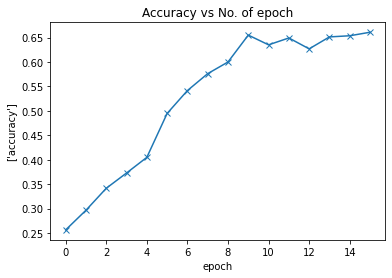

In [ ]:
plot_accuracies(history)

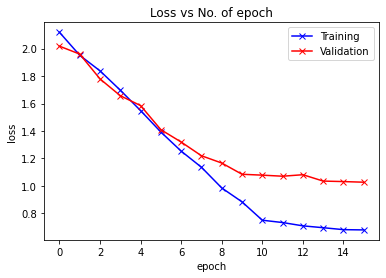

In [ ]:
plot_losses(history)

### Testing with individual images

In [ ]:
def predict_image(img, model):
  # Convert to a batch of 1
  xb = to_device(img.unsqueeze(0),device)
  yb = model(xb)
  # Pick index with highest probability
  _, preds = torch.max(yb, dim = 1)
  # Retrieve the class label
  return classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Australian terrier , Predicted: Australian terrier


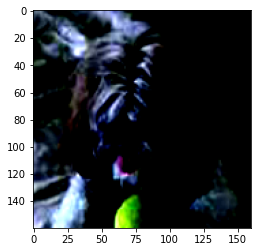

In [ ]:
img, label = test_ds[0]
plt.imshow(img.permute(1,2,0))
print("Label:", classes[label], ', Predicted:', predict_image(img,model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: English foxhound , Predicted: Border terrier


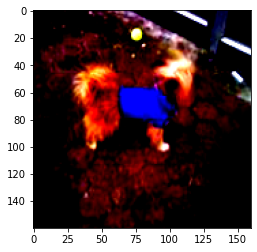

In [ ]:
img, label = test_ds[250]
plt.imshow(img.permute(1,2,0))
print("Label:", classes[label], ', Predicted:', predict_image(img,model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Golden retriever , Predicted: Golden retriever


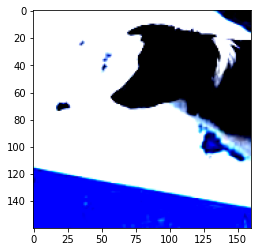

In [ ]:
img, label = test_ds[400]
plt.imshow(img.permute(1,2,0))
print("Label:", classes[label], ', Predicted:', predict_image(img,model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_ds, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.46612340211868286, 'val_loss': 1.6142189502716064}

In [ ]:
jovian.log_metrics(test_loss = result['val_loss'], test_acc = result['val_acc'])

[jovian] Metrics logged.


### Saving and Loading the model

In [ ]:
torch.save(model.state_dict(), 'imagewoof-1.pth')

In [ ]:
model2 = to_device(Imagewoof(), device)

In [ ]:
model2.load_state_dict(torch.load('imagewoof-1.pth'))

<All keys matched successfully>

In [ ]:
evaluate(model2, test_loader)

{'val_acc': 0.4707704782485962, 'val_loss': 1.6020182371139526}